## Importing Required Libraries:

In [117]:
from keras.preprocessing import sequence
from keras.models import Model
import keras

In [118]:
import pandas as pd
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Conversation Starter:

In [120]:
def greetings():
    print('Hey!')
    print('*********************************************************')
    print("I'm Probot. How may I help you?")
    print('*********************************************************')
    product_name = str(input("Enter the product you want to review:"))
    return product_name

## Getting Amazon Website:

In [121]:
driver = webdriver.Chrome(executable_path='C:\Windows\chromedriver')
driver.get('https://www.amazon.in/')

In [122]:
input_field = driver.find_element_by_id('twotabsearchtextbox')
prod_name = greetings()
input_field.send_keys(prod_name)
driver.find_element_by_id('nav-search-submit-button').click()

Hey!
*********************************************************
I'm Probot. How may I help you?
*********************************************************
Enter the product you want to review:iphone 13


## Searching for the Input Product:

In [123]:
product = driver.find_element_by_class_name('s-card-container')
product_link = product.find_element_by_tag_name('a')
product_link.click()

In [124]:
driver.switch_to.window(driver.window_handles[1])

In [125]:
driver.find_element_by_link_text('See all reviews').click()

## Getting all the Customer Reviews for the Product:

In [126]:
reviews = []

In [127]:
def get_reviews(): 
    all_reviews = driver.find_elements_by_class_name('review-text')
    for review in all_reviews:
        reviews.append(review.text)

In [128]:
get_reviews()
next_page = True
while(next_page):
    if len(reviews)>=50:
        break
    try:
        driver.find_element_by_id('cm_cr-pagination_bar').find_element_by_class_name('a-last').find_element_by_tag_name('a').click()
        time.sleep(6)
        get_reviews()
    except:
        next_page = False
reviews = list(set(reviews))

In [129]:
for i in range(len(reviews)):
    reviews[i] = reviews[i].replace('\n','').strip()

## Preprocessing Review Data:

In [130]:
def preprocess(txt):
    txt = re.sub(r"[^a-zA-Z0-9]", " ", txt)
    txt = txt.split()
    filtered_txt = []
    for word in txt:
        if word not in stop_words and len(word)>2:
            filtered_txt.append(word)
    filtered_txt = [lemmatizer.lemmatize(w) for w in filtered_txt if len(w)>1]
    filtered_txt = " ".join(u for u in filtered_txt if u not in ("?", ".", ";", ":",  "!",'"')) 
    return filtered_txt

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [131]:
processed_reviews = []
for review in reviews:
    processed_reviews.append(preprocess(review))

## Loading the Saved Model:

In [132]:
new_model = keras.models.load_model('sentiment_model')

## Predicting Sentiment for the Reviews:

In [133]:
def predict_sentiment(reviews):
    final_sequences = tok.texts_to_sequences(reviews)
    final_sequences_matrix = sequence.pad_sequences(final_sequences,maxlen=max_len)
    predictions = new_model.predict(final_sequences_matrix)
    pred = []
    for i in predictions:
        if i[0]>0.5:
            pred.append(1)
        else:
            pred.append(0)
    return pred

In [134]:
import pickle
# loading
with open('tokenizer.pickle', 'rb') as handle:
    tok = pickle.load(handle)
max_words = 1000
max_len = 100

In [135]:
predictions = pd.DataFrame({'Predictions': predict_sentiment(processed_reviews)})

In [136]:
predictions['Predictions'] = predictions['Predictions'].map({0:'Negative', 1:'Positive'})

## Visualizing Predicted Sentiments:

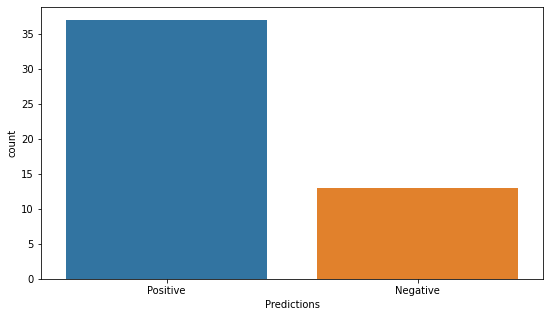

In [137]:
plt.figure(figsize=(9,5))
sns.countplot(x='Predictions', data=predictions)
plt.show()

## Final Recommendation for the User:

In [138]:
print('Sorry to keep you waiting...')
print('*******************************************************************')
print('Your Probot is here with the results!!!')
print('*******************************************************************')
if predictions['Predictions'].value_counts()[0]/len(predictions)*100>=55:
    print('This product is a good choice according to the reviews and you may buy it.')
else:
    print('This product has a lot of negative reviews. Therefore, it is suggested not to buy this product as far as\
    customer reviews are considered')
print('*******************************************************************')
print('I hope you liked the service. Come back soon with another product :)')
print('*******************************************************************')
print('Thank You!')

Sorry to keep you waiting...
*******************************************************************
Your Probot is here with the results!!!
*******************************************************************
This product is a good choice according to the reviews and you may buy it.
*******************************************************************
I hope you liked the service. Come back soon with another product :)
*******************************************************************
Thank You!
